In [1]:
# Data Analyis on Customers defaulted on loans

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from pandas_profiling import ProfileReport

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
##import/integrate data set in a varaible

In [3]:
credit = pd.read_csv('default of credit card clients.csv', header=1)

In [4]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
credit.describe()

ID       LIMIT_BAL      MARRIAGE           AGE         PAY_0  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.551867     35.485500     -0.016700   
std     8660.398374   129747.661567      0.521970      9.217904      1.123802   
min        1.000000    10000.000000      0.000000     21.000000     -2.000000   
25%     7500.750000    50000.000000      1.000000     28.000000     -1.000000   
50%    15000.500000   140000.000000      2.000000     34.000000      0.000000   
75%    22500.250000   240000.000000      2.000000     41.000000      0.000000   
max    30000.000000  1000000.000000      3.000000     79.000000      8.000000   

              PAY_2         PAY_3         PAY_4         PAY_5         PAY_6  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.133767     -0.166200     -0.220667     -0.266200     -0.291100   
std        1.197186      1.196868      1.169139      1.133187      1.149988   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...     BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  ...  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   ...  4.701315e+04   43262.948967   40311.400967   38871.760400   
std    ...  6.934939e+04   64332.856134   60797.155770   59554.107537   
min    ... -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    ...  2.666250e+03    2326.750000    1763.000000    1256.000000   
50%    ...  2.008850e+04   19052.000000   18104.500000   17071.000000   
75%    ...  6.016475e+04   54506.000000   50190.500000   49198.250000   
max    ...  1.664089e+06  891586.000000  927171.000000  961664.000000   

            PAY_AMT1      PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   30000.000000   30000.000000  
mean     4799.387633    5215.502567  
std     15278.305679   17777.465775  
min         0.000000       0.000000  
25%       252.500000     117.750000  
50%      1500.000000    1500.000000  
75%      4031.500000    4000.000000  
max    426529.000000  528666.000000  

[8 rows x 22 columns]

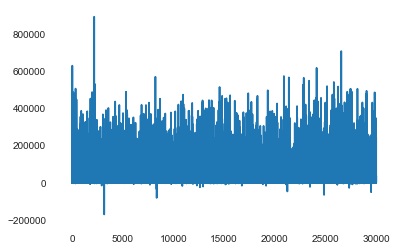

In [6]:
plt.plot(credit['BILL_AMT4'])
plt.show()

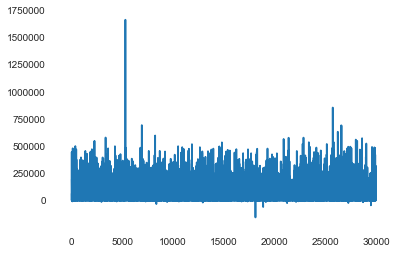

In [7]:
plt.plot(credit['BILL_AMT3'])
plt.show()

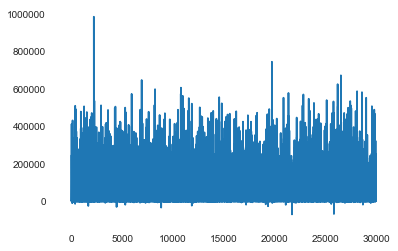

In [8]:
plt.plot(credit['BILL_AMT2'])
plt.show()

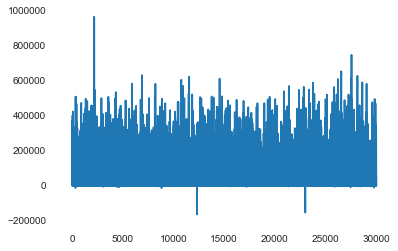

In [9]:
plt.plot(credit['BILL_AMT1'])
plt.show()

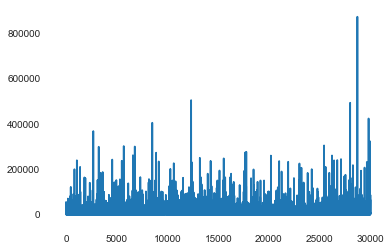

In [10]:
plt.plot(credit['PAY_AMT1'])
plt.show()

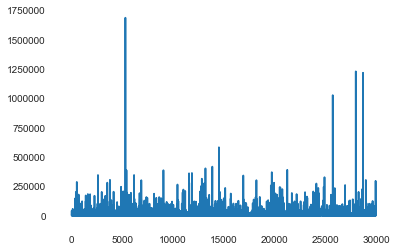

In [11]:
plt.plot(credit['PAY_AMT2'])
plt.show()

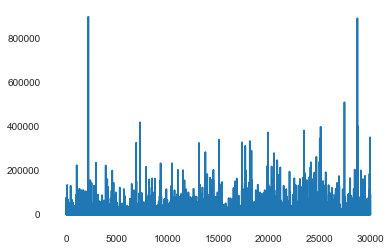

In [12]:
plt.plot(credit['PAY_AMT3'])
plt.show()

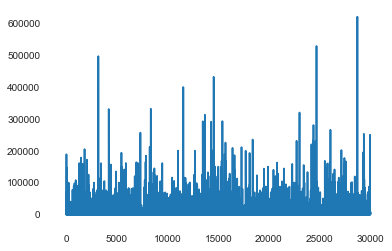

In [13]:
plt.plot(credit['PAY_AMT4'])
plt.show()

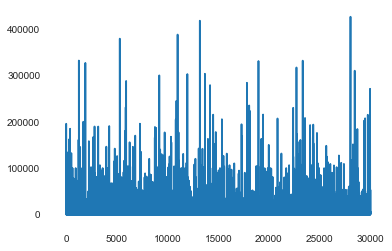

In [14]:
plt.plot(credit['PAY_AMT5'])
plt.show()

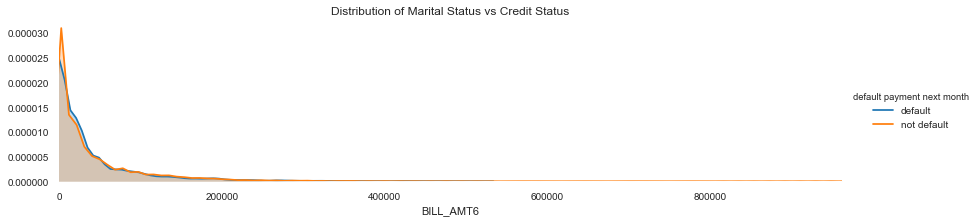

In [15]:
fig = sns.FacetGrid(credit, hue='default payment next month', aspect =4)
fig.map(sns.kdeplot, 'BILL_AMT6', shade=True)
top = credit['BILL_AMT6'].max()
fig.set(xlim=(0,top))
fig.set(title='Distribution of Marital Status vs Credit Status')
fig.add_legend()

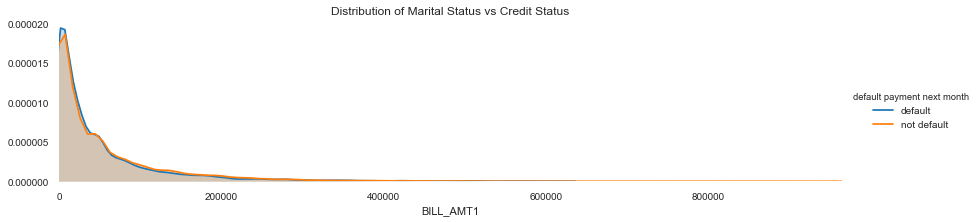

In [16]:
fig = sns.FacetGrid(credit, hue='default payment next month', aspect =4)
fig.map(sns.kdeplot, 'BILL_AMT1', shade=True)
top = credit['BILL_AMT1'].max()
fig.set(xlim=(0,top))
fig.set(title='Distribution of Marital Status vs Credit Status')
fig.add_legend()

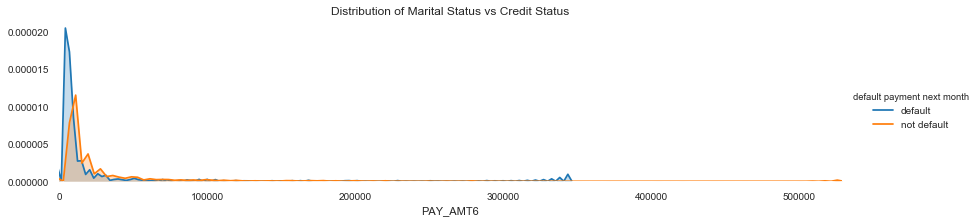

In [17]:
fig = sns.FacetGrid(credit, hue='default payment next month', aspect =4)
fig.map(sns.kdeplot, 'PAY_AMT6', shade=True)
top = credit['PAY_AMT6'].max()
fig.set(xlim=(0,top))
fig.set(title='Distribution of Marital Status vs Credit Status')
fig.add_legend()

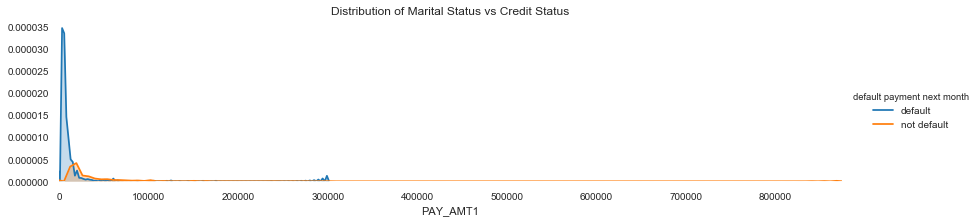

In [18]:
fig = sns.FacetGrid(credit, hue='default payment next month', aspect =4)
fig.map(sns.kdeplot, 'PAY_AMT1', shade=True)
top = credit['PAY_AMT1'].max()
fig.set(xlim=(0,top))
fig.set(title='Distribution of Marital Status vs Credit Status')
fig.add_legend()

In [19]:
credit.head()

ID  LIMIT_BAL     SEX   EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   1      20000  female  university         1   24      2      2     -1   
1   2     120000  female  university         2   26     -1      2      0   
2   3      90000  female  university         2   34      0      0      0   
3   4      50000  female  university         1   37      0      0      0   
4   5      50000    male  university         1   57     -1      0     -1   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -1  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                     default  
1      1000         0      2000                     default  
2      1000      1000      5000                 not default  
3      1100      1069      1000                 not default  
4      9000       689       679                 not default  

[5 rows x 25 columns]

In [20]:
credit.rename(columns = {'default payment next month':'target'}, inplace = True)

In [21]:
#DataFrame has 30,000 rows, & 25 columns)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
target       30000 non-null object
dtypes: int64(22), object(3)
memory us

In [22]:
#DataFrame is two Dimentional
credit.ndim

2

In [23]:
#One-Hot Encoding Pandas* Approach 1
credit1 = pd.get_dummies(credit)

In [24]:
#Checking the DataTypes 
credit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
ID                           30000 non-null int64
LIMIT_BAL                    30000 non-null int64
MARRIAGE                     30000 non-null int64
AGE                          30000 non-null int64
PAY_0                        30000 non-null int64
PAY_2                        30000 non-null int64
PAY_3                        30000 non-null int64
PAY_4                        30000 non-null int64
PAY_5                        30000 non-null int64
PAY_6                        30000 non-null int64
BILL_AMT1                    30000 non-null int64
BILL_AMT2                    30000 non-null int64
BILL_AMT3                    30000 non-null int64
BILL_AMT4                    30000 non-null int64
BILL_AMT5                    30000 non-null int64
BILL_AMT6                    30000 non-null int64
PAY_AMT1                     30000 non-null int64
PAY_AMT2                     30000 non-nu

# Data Clean-up, Remove the outliers

In [25]:
#I found there are outlier for AGE > 60, so limit the column AGE to 60 years old.
credit1 = credit1.loc[(credit1['AGE'] <= 60)]

In [26]:
#I found there are outlier, limitng the columns values for Marriage & Credit Limit.
credit1 = credit1.loc[(credit1['MARRIAGE'] >= 1) & (credit1['MARRIAGE'] <= 2)]

In [27]:
credit1 = credit1.loc[(credit1['LIMIT_BAL'] >= 20000) & (credit1['LIMIT_BAL'] <= 300000)]

In [28]:
header = credit1.dtypes.index

In [30]:
print(credit1)

       LIMIT_BAL  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0          20000         1   24      2      2     -1     -1     -2     -2   
1         120000         2   26     -1      2      0      0      0      2   
2          90000         2   34      0      0      0      0      0      0   
3          50000         1   37      0      0      0      0      0      0   
4          50000         1   57     -1      0     -1      0      0      0   
...          ...       ...  ...    ...    ...    ...    ...    ...    ...   
29995     220000         1   39      0      0      0      0      0      0   
29996     150000         2   43     -1     -1     -1     -1      0      0   
29997      30000         2   37      4      3      2     -1      0      0   
29998      80000         1   41      1     -1      0      0      0     -1   
29999      50000         1   46      0      0      0      0      0      0   

       BILL_AMT1  ...  PAY_AMT5  PAY_AMT6  SEX_female  SEX_male  \
0       

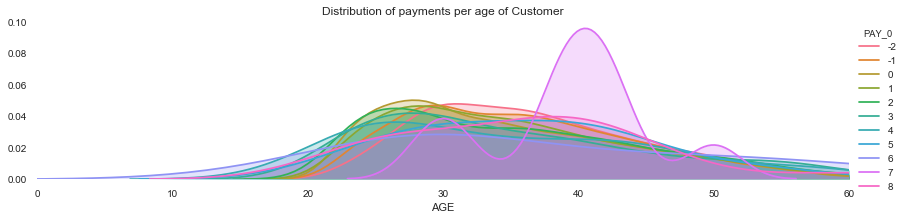

In [36]:
fig = sns.FacetGrid(credit, hue='PAY_0', aspect =4)
fig.map(sns.kdeplot, 'AGE', shade=True)
top = credit1['AGE'].max()
fig.set(xlim=(0,top))
fig.set(title='Distribution of payments per age of Customer')
fig.add_legend()

In [37]:
#credit1.profile_report()

In [38]:
corrMat = credit1.corr()
print(corrMat)

                           LIMIT_BAL  MARRIAGE       AGE     PAY_0     PAY_2  \
LIMIT_BAL                   1.000000 -0.079367  0.106272 -0.264601 -0.296577   
MARRIAGE                   -0.079367  1.000000 -0.463544  0.000211  0.003496   
AGE                         0.106272 -0.463544  1.000000 -0.027415 -0.031389   
PAY_0                      -0.264601  0.000211 -0.027415  1.000000  0.672210   
PAY_2                      -0.296577  0.003496 -0.031389  0.672210  1.000000   
PAY_3                      -0.285889  0.013948 -0.034043  0.567888  0.759347   
PAY_4                      -0.268505  0.013807 -0.032149  0.532756  0.651545   
PAY_5                      -0.253737  0.019216 -0.039335  0.501856  0.609906   
PAY_6                      -0.233845  0.017176 -0.036205  0.464283  0.560873   
BILL_AMT1                   0.261653 -0.023162  0.042016  0.203602  0.257072   
BILL_AMT2                   0.255079 -0.021794  0.039746  0.208553  0.256896   
BILL_AMT3                   0.253935 -0.

In [39]:
#Credit Limit Group by Payment
credit1.groupby(['target_default', 'LIMIT_BAL'])['target_default'].count()

target_default  LIMIT_BAL
0               20000        1236
                30000        1018
                40000         136
                50000        2403
                60000         574
                70000         501
                80000        1173
                90000         474
                100000        768
                110000        445
                120000        536
                130000        567
                140000        569
                150000        905
                160000        548
                170000        447
                180000        806
                190000        176
                200000       1229
                210000        606
                220000        376
                230000        617
                240000        500
                250000        293
                260000        426
                270000        207
                280000        417
                290000        293
                300000

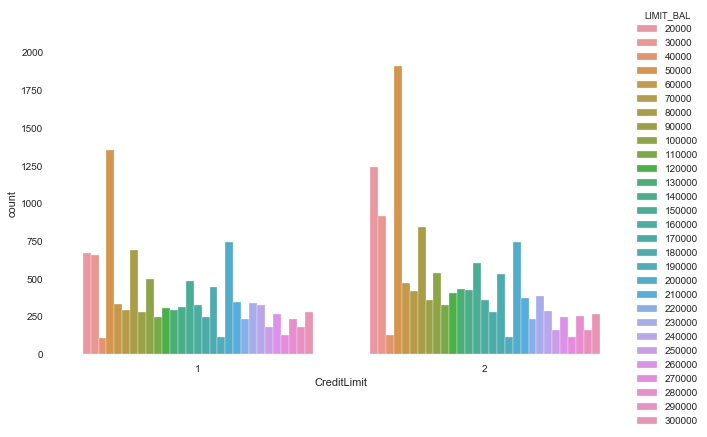

In [40]:
# Credit Limit Group by Pay Amount
g = sns.catplot('MARRIAGE', data=credit1, hue='LIMIT_BAL', kind='count', aspect=1.75)
g.set_xlabels('CreditLimit')

In [41]:
# Number of customer default class grouped by Education.
credit1.pivot_table('LIMIT_BAL', 'AGE', 'MARRIAGE', aggfunc=np.sum, margins=True)

MARRIAGE           1           2         All
AGE                                         
21            230000     1180000     1410000
22           2150000    18290000    20440000
23           4890000    49220000    54110000
24           8860000    70920000    79780000
25          13990000    90540000   104530000
26          16840000   114960000   131800000
27          25330000   135230000   160560000
28          32220000   134480000   166700000
29          36440000   151360000   187800000
30          48040000   125460000   173500000
31          44720000    99540000   144260000
32          50440000    82330000   132770000
33          55610000    78110000   133720000
34          72510000    60800000   133310000
35          71220000    55620000   126840000
36          75720000    53650000   129370000
37          78780000    38990000   117770000
38          69040000    36240000   105280000
39          75390000    31850000   107240000
40          75200000    26490000   101690000
41          66050000    22270000    88320000
42          62550000    21910000    84460000
43          52140000    19350000    71490000
44          55030000    17720000    72750000
45          51320000    12930000    64250000
46          41290000    13370000    54660000
47          36680000    13340000    50020000
48          33500000    12480000    45980000
49          34280000     7500000    41780000
50          32920000     7620000    40540000
51          26460000     6630000    33090000
52          19420000     7280000    26700000
53          23200000     6400000    29600000
54          18040000     4000000    22040000
55          15780000     3780000    19560000
56          13250000     3230000    16480000
57           7400000     2170000     9570000
58          10240000     1470000    11710000
59           5000000     1520000     6520000
60           6050000     1110000     7160000
All       1468220000  1641340000  3109560000

In [42]:
table = pd.crosstab(index=[credit.target,credit.MARRIAGE], columns=[credit.target,credit.SEX])

In [43]:
table.unstack()

target      default                                      not default        \
SEX          female                 male                      female         
MARRIAGE          0     1     2   3    0     1     2   3           0     1   
target                                                                       
default           3  1860  1856  44    2  1346  1485  40           0     0   
not default       0     0     0   0    0     0     0   0          37  6609   

target                                       
SEX                    male                  
MARRIAGE        2    3    0     1     2   3  
target                                       
default         0    0    0     0     0   0  
not default  7555  148   12  3844  5068  91

In [44]:
table.columns, table.index

(MultiIndex([(    'default', 'female'),
             (    'default',   'male'),
             ('not default', 'female'),
             ('not default',   'male')],
            names=['target', 'SEX']), MultiIndex([(    'default', 0),
             (    'default', 1),
             (    'default', 2),
             (    'default', 3),
             ('not default', 0),
             ('not default', 1),
             ('not default', 2),
             ('not default', 3)],
            names=['target', 'MARRIAGE']))

In [45]:
credit1.AGE.describe()

count    24395.000000
mean        34.787579
std          8.884594
min         21.000000
25%         28.000000
50%         33.000000
75%         41.000000
max         60.000000
Name: AGE, dtype: float64

In [46]:
# Drop missing values for the records in which age is missing
age = credit1['AGE'].dropna()

Text(0.5, 1.0, "Distribution of Passengers' Ages")

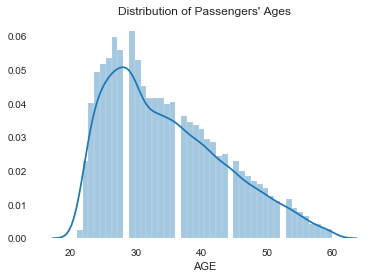

In [47]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Passengers' Ages")

In [48]:
credit1.LIMIT_BAL.describe()

count     24395.000000
mean     127467.103915
std       81760.771911
min       20000.000000
25%       50000.000000
50%      110000.000000
75%      200000.000000
max      300000.000000
Name: LIMIT_BAL, dtype: float64

In [49]:
# Drop missing values for the records
limit = credit1['LIMIT_BAL'].dropna()

Text(0.5, 1.0, "Distribution of Credit Limit' Customers")

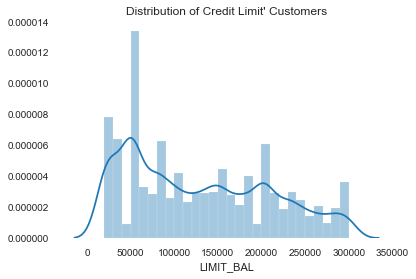

In [50]:
# Distribution of Credit Limit, with an overlay of a density plot
limit_dist = sns.distplot(limit)
limit_dist.set_title("Distribution of Credit Limit' Customers")

In [51]:
credit1.LIMIT_BAL.describe()

count     24395.000000
mean     127467.103915
std       81760.771911
min       20000.000000
25%       50000.000000
50%      110000.000000
75%      200000.000000
max      300000.000000
Name: LIMIT_BAL, dtype: float64

In [67]:
X = credit1.loc[:, credit1.columns != 'LIMIT_BAL']
y = credit1.iloc[:, 0]

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [70]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

y_pred= classifier_lr.predict(X_test)

/Users/skommuri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/skommuri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/skommuri/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [71]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       20000       0.07      0.09      0.08       303
       30000       0.20      0.02      0.04       244
       40000       0.00      0.00      0.00        37
       50000       0.17      0.89      0.29       453
       60000       0.00      0.00      0.00       117
       70000       0.00      0.00      0.00       108
       80000       0.00      0.00      0.00       207
       90000       0.00      0.00      0.00        92
      100000       0.08      0.01      0.01       143
      110000       0.00      0.00      0.00        91
      120000       0.00      0.00      0.00       104
      130000       0.00      0.00      0.00        99
      140000       0.01      0.01      0.01       110
      150000       0.08      0.02      0.04       168
      160000       0.00      0.00      0.00       110
      170000       0.00      0.00      0.00        74
      180000       0.33      0.01      0.03       154
      190000       0.00    

/Users/skommuri/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [93]:
from sklearn.svm import SVC
from sklearn import svm

# fit the model and get the separating hyperplane
#clf = svm.SVC(kernel='linear', C=1.0) clf.fit(X, y)

C = 1.0 # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
svm.LinearSVC(C=C, max_iter=10000), svm.SVC(kernel='rbf', gamma=0.7, C=C), svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))

models = (clf.fit(X, y) for clf in models)

In [94]:
SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [95]:
y_pred1 = clf.predict(X_test)

In [96]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

       20000       0.99      0.99      0.99       303
       30000       1.00      0.99      0.99       244
       40000       1.00      0.95      0.97        37
       50000       0.95      0.99      0.97       453
       60000       1.00      0.99      1.00       117
       70000       1.00      0.99      1.00       108
       80000       1.00      0.99      0.99       207
       90000       1.00      0.96      0.98        92
      100000       1.00      0.99      0.99       143
      110000       1.00      1.00      1.00        91
      120000       1.00      0.90      0.95       104
      130000       1.00      0.98      0.99        99
      140000       1.00      0.99      1.00       110
      150000       1.00      0.98      0.99       168
      160000       1.00      0.95      0.98       110
      170000       1.00      0.97      0.99        74
      180000       0.90      0.97      0.93       154
      190000       1.00    

In [97]:
clf2 = svm.SVC()
clf2.fit(X, y) 
SVC()

/Users/skommuri/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [98]:
y_pred2 = clf.predict(X_test)

In [99]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

       20000       0.99      0.99      0.99       303
       30000       1.00      0.99      0.99       244
       40000       1.00      0.95      0.97        37
       50000       0.95      0.99      0.97       453
       60000       1.00      0.99      1.00       117
       70000       1.00      0.99      1.00       108
       80000       1.00      0.99      0.99       207
       90000       1.00      0.96      0.98        92
      100000       1.00      0.99      0.99       143
      110000       1.00      1.00      1.00        91
      120000       1.00      0.90      0.95       104
      130000       1.00      0.98      0.99        99
      140000       1.00      0.99      1.00       110
      150000       1.00      0.98      0.99       168
      160000       1.00      0.95      0.98       110
      170000       1.00      0.97      0.99        74
      180000       0.90      0.97      0.93       154
      190000       1.00    

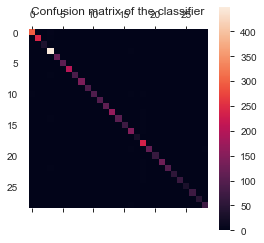

In [100]:
from sklearn.metrics import confusion_matrix
import pylab as pl

cm = confusion_matrix(y_test, y_pred2)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()